# Exercise Modul 3: Preprocessing

Pada exercise kali ini kita akan menggunakan beberapa metode yang telah kita pelajari:

- Input missing value
- Encoding
- Scaling
- Regularization


<br>- Feature: 'Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Regionname','Propertycount'
<br>- Target: 'Price'

Yang dilakukan pada preprocessing dan modeling:
- Ada 4 feature yang mengandung missing value. Isi missing value tsb dengan imputer yang sesuai dengan karakter masing-masing feature/kolomnya.
- Ada 5 feature categorical. Lakukan Encoding pada features tersebut sesuai dengan karakter masing-masing feature/kolomnya.
- Scaling semua feature. Pilih scaler yang menurut kamu paling cocok
- Lakukan prediksi dengan metode Lasso pada data yang sudah siap 


In [1]:
import pandas as pd
import numpy as np

# Input missing value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# akurasi
from sklearn.metrics import mean_squared_error

# Model
from sklearn.linear_model import Lasso
import statsmodels.api as sm 

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
raw = pd.read_csv('data/melb_data.csv')
df = raw.copy()
df


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## Exploring Data

In [3]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
x = df[['Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Regionname','Propertycount']]
y = df['Price']

In [5]:
x.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Regionname          0
Propertycount       0
dtype: int64

<AxesSubplot:>

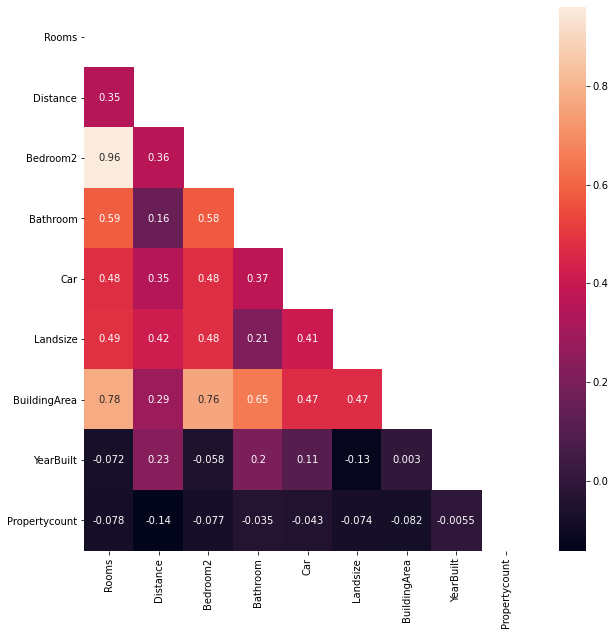

In [6]:
mtx = np.triu(x.corr())
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(method='spearman'), annot=True, mask=mtx)


In [7]:
x

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,3,h,PI,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,S,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,South-Eastern Metropolitan,7392.0
13576,Williamstown,3,h,SP,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,Western Metropolitan,6380.0
13577,Williamstown,3,h,S,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,Western Metropolitan,6380.0
13578,Williamstown,4,h,PI,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,Western Metropolitan,6380.0


In [6]:
cat = ['Suburb','Type','Method','CouncilArea','Regionname']
num = ['Rooms','Distance','Bedroom2','Bathroom','Landsize','BuildingArea','Propertycount']

### 1. Input Missing Value

In [7]:
imputer = IterativeImputer()
x[num] = imputer.fit_transform(df[num])
x.isna().sum()

C:\Users\62812\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Suburb              0
Rooms               0
Type                0
Method              0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Regionname          0
Propertycount       0
dtype: int64

In [8]:
imputer = SimpleImputer(strategy='median')
x[['Car','YearBuilt']] = imputer.fit_transform(x[['Car','YearBuilt']])
x.isna().sum()

C:\Users\62812\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Suburb              0
Rooms               0
Type                0
Method              0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Regionname          0
Propertycount       0
dtype: int64

In [9]:
imput_simple = SimpleImputer(strategy='most_frequent')
x['CouncilArea'] = imput_simple.fit_transform(x[['CouncilArea']])
x.isna().sum()

C:\Users\62812\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Suburb           0
Rooms            0
Type             0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

## 2. Encoding

In [10]:
x.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [11]:
x

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2.0,h,S,2.5,2.0,1.0,1.0,202.0,25.564191,1970.0,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,2.0,h,S,2.5,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,3.0,h,SP,2.5,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,3.0,h,PI,2.5,3.0,2.0,1.0,94.0,45.527969,1970.0,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,4.0,h,VB,2.5,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4.0,h,S,16.7,4.0,2.0,2.0,652.0,244.280331,1981.0,Moreland,South-Eastern Metropolitan,7392.0
13576,Williamstown,3.0,h,SP,6.8,3.0,2.0,2.0,333.0,133.000000,1995.0,Moreland,Western Metropolitan,6380.0
13577,Williamstown,3.0,h,S,6.8,3.0,2.0,4.0,436.0,140.944345,1997.0,Moreland,Western Metropolitan,6380.0
13578,Williamstown,4.0,h,PI,6.8,4.0,1.0,5.0,866.0,157.000000,1920.0,Moreland,Western Metropolitan,6380.0


In [12]:
x['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [15]:
onehot_var =  ['Type','Method','Regionname']
binary_var = ['Suburb','CouncilArea']
ordinal_var = ['YearBuilt']
onehot = OneHotEncoder(drop='first')
binary = ce.BinaryEncoder()
ordinal = OrdinalEncoder()

transformer = ColumnTransformer([
    ('onehot',onehot,onehot_var),
    ('binary',binary,binary_var)
], remainder='passthrough')

In [25]:
#Import the libraries
import category_encoders as ce
import pandas as pd

#Create the Dataframe
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra','a','b','c','f']})

#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['City'],return_df=True)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad
7,Mumbai
8,Agra
9,a


In [26]:
#Fit and Transform Data 
data_encoded=encoder.fit_transform(data) 
data_encoded

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,City_0,City_1,City_2,City_3,City_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,1,0,1
5,0,0,0,0,1
6,0,0,0,1,1
7,0,0,0,1,0
8,0,0,1,1,0
9,0,0,1,1,1


### 3. Scaling

In [16]:
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2020
)

In [17]:
x_train

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
12761,Kew,3.0,h,S,5.4,3.0,2.0,2.0,460.0,138.628498,2000.0,Moreland,Southern Metropolitan,10331.0
5272,Richmond,5.0,h,SP,2.6,5.0,3.0,3.0,618.0,260.000000,1890.0,Yarra,Northern Metropolitan,14949.0
4772,Port Melbourne,2.0,u,S,3.8,1.0,1.0,1.0,0.0,70.000000,2005.0,Port Phillip,Southern Metropolitan,8648.0
4711,Port Melbourne,2.0,u,VB,3.8,2.0,2.0,1.0,0.0,-4.434101,1970.0,Port Phillip,Southern Metropolitan,8648.0
11201,Southbank,2.0,u,S,0.7,2.0,1.0,1.0,0.0,88.000000,1970.0,Melbourne,Southern Metropolitan,8400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,Doncaster,2.0,u,VB,13.9,2.0,1.0,2.0,0.0,-2.281001,1970.0,Manningham,Eastern Metropolitan,9028.0
11971,Doncaster East,3.0,t,PI,14.3,3.0,2.0,2.0,253.0,253.000000,1970.0,Manningham,Eastern Metropolitan,10999.0
7491,Balwyn North,4.0,h,S,9.2,4.0,3.0,2.0,636.0,227.000000,1960.0,Boroondara,Southern Metropolitan,7809.0
12680,Carnegie,2.0,t,S,10.1,2.0,2.0,1.0,117.0,101.000000,2007.0,Moreland,Southern Metropolitan,7822.0


In [18]:
x_train_scaled = transformer.fit_transform(x_train)
x_test_scaled = transformer.transform(x_test)

C:\Users\62812\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [19]:
hyperparam_alpha = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
train = []
test = []
score = 1000000000000
best_alpha=0
for i in hyperparam_alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(x_train_scaled,y_train)
    
    y_train_pred = lasso.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train,y_train_pred)
    train.append(mse_train)
    
    y_test_pred = lasso.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test,y_test_pred)
    test.append(mse_test)
    
    if score > mse_test:
        score = mse_test
        best_alpha = i
test
print("best mse {}, best alpha {}".format(score,best_alpha))

best mse 172881576945.82068, best alpha 1e-06


In [20]:
pd.DataFrame(
    {
        'alpha': hyperparam_alpha,
        'train MSE': train,
        'test MSE': test
    }
)

,alpha,train MSE,test MSE
0,100000.000000,2.546098e+11,2.809904e+11
1,10000.000000,1.705109e+11,1.851729e+11
2,1000.000000,1.611313e+11,1.757351e+11
3,100.000000,1.604578e+11,1.732531e+11
4,10.000000,1.604229e+11,1.729140e+11
5,1.000000,1.604225e+11,1.728848e+11
6,0.100000,1.604225e+11,1.728819e+11
7,0.010000,1.604225e+11,1.728816e+11
8,0.001000,1.604225e+11,1.728816e+11
9,0.000100,1.604225e+11,1.728816e+11


C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anacond

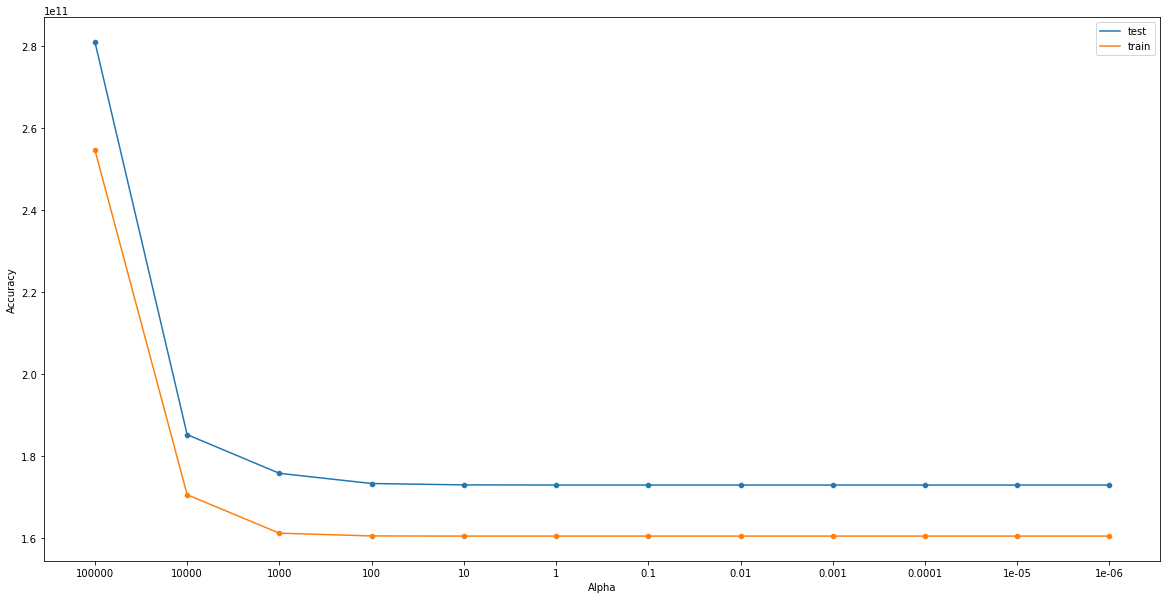

In [21]:
length = range(len(hyperparam_alpha))

plt.figure(figsize=(20,10))

sns.lineplot(length,test)
sns.scatterplot(length,test)

sns.lineplot(length,train)
sns.scatterplot(length,train)

plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.xticks(length,hyperparam_alpha)

plt.legend(['test','train'])
plt.show()

In [22]:
length

range(0, 12)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression